In [ ]:
%pip install mlxtend --upgrade
%pip install JasonUtils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 8.7 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 23.2 MB/s 
     |████████████████████████████████| 2.0 MB 34.2 MB/s 
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp37-cp37m-linux_x86_64.whl size=2065936 sha256=63c0f3ff6cf0d6c9ed5cd375628533bee1df9f2749b17029c67f39aba5d6d96e
  Stored in directory: /root/.cache/pip/wheels/9a/d6/39/e26b6f988cc5acd1fba2c1b18f0debe27bdee3e1e53f4c93f9
Successfully built simpleaudio


In [ ]:
import numpy as np
from JasonUtils.TicToc import timing
from matplotlib import pyplot as plt
from mlxtend.evaluate import bias_variance_decomp
from sklearn import clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, Lasso, LassoLarsIC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import check_random_state, shuffle

import warnings

warnings.filterwarnings('ignore')

In [ ]:
def generateDataset(
        xRange,
        fun=lambda x: x,
        shuffleDataset=True,
        randomState=None,
        mean=0,
        stdev=4,
):
    rs = check_random_state(randomState)
    X = np.arange(*xRange, dtype=float)
    y = np.array([fun(x) for x in X], dtype=float)
    y += rs.normal(mean, stdev, y.shape)
    X = X.reshape((-1, 1))
    if shuffleDataset:
        X, y = shuffle(X, y, random_state=randomState)
    return X, y

In [ ]:
def plotTrDev(
        trX,
        trY,
        valX,
        valY,
):
    plt.scatter(trX, trY, label='Training Set')
    plt.scatter(valX, valY, label='Validation Set')

In [ ]:
def plotCurve(xRange, est):
    xSpace = np.linspace(*xRange)
    ySpace = est.predict(xSpace.reshape((-1, 1)))
    plt.plot(xSpace, ySpace, label=f'Pred Line')

In [ ]:
def f(X):
    return 3 * X + 1

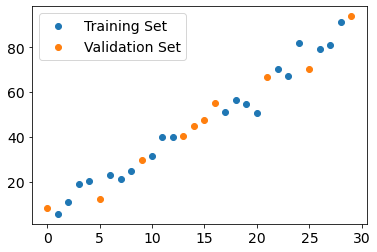

In [ ]:
plt.rcParams.update({'font.size': 14})

xMin = 0
xMax = 30
xRange = (xMin, xMax)
rs = 0
X, y = generateDataset(
    xRange=xRange,
    fun=f,
    randomState=rs,
)
trX, valX, trY, valY = train_test_split(
    X, y,
    test_size=0.33,
    random_state=rs
)
plotTrDev(trX, trY, valX, valY)
plt.legend()
plt.show()

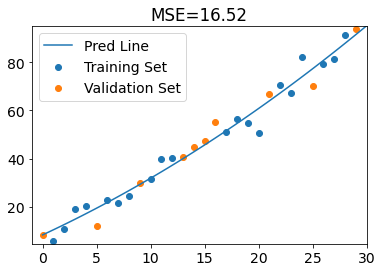

In [ ]:
degree = 2
alpha = 1

model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('regression', Ridge(alpha=alpha)),
])
model.fit(trX, trY)
predY = model.predict(valX)
mse = mean_squared_error(valY, predY)
plt.figure()
plotTrDev(trX, trY, valX, valY)
plotCurve(xRange, model)
plt.title(f'MSE={mse:.2f}')
plt.legend()
plt.xlim([X.min() - 1, X.max() + 1])
plt.ylim([y.min() - 1, y.max() + 1])
plt.show()

alpha=0.1; degree=1 15.950905878802999 15.952908501770747 2.1081889219202474
alpha=0.1; degree=2 16.045207923787412 16.31317255787715 3.7904306300330584
alpha=0.1; degree=5 25.8468283201786 29.42080891852138 228.19084019853656
alpha=0.1; degree=10 410.2766427169296 49074.39681299827 361428.52959995886
alpha=1; degree=1 15.634023506751419 15.656562735561938 1.91602514651951
alpha=1; degree=2 14.852417563543664 14.879682438244435 3.1862035119723706
alpha=1; degree=5 25.939690650834354 31.413443744763384 175.10843342217493
alpha=1; degree=10 410.2766427169296 49074.27883106554 361398.0226223284
alpha=10; degree=1 16.161747370572805 16.23618487888828 1.4492536056098362
alpha=10; degree=2 16.140123302302946 16.36551620860695 3.0616605151291543
alpha=10; degree=5 26.581475294856194 26.839515738329773 92.50195615256132
alpha=10; degree=10 410.2766427169296 49113.05966304285 361184.53381767415
alpha=100; degree=1 19.140294014746132 19.24119604812632 1.2675968212061144
alpha=100; degree=2 20.47

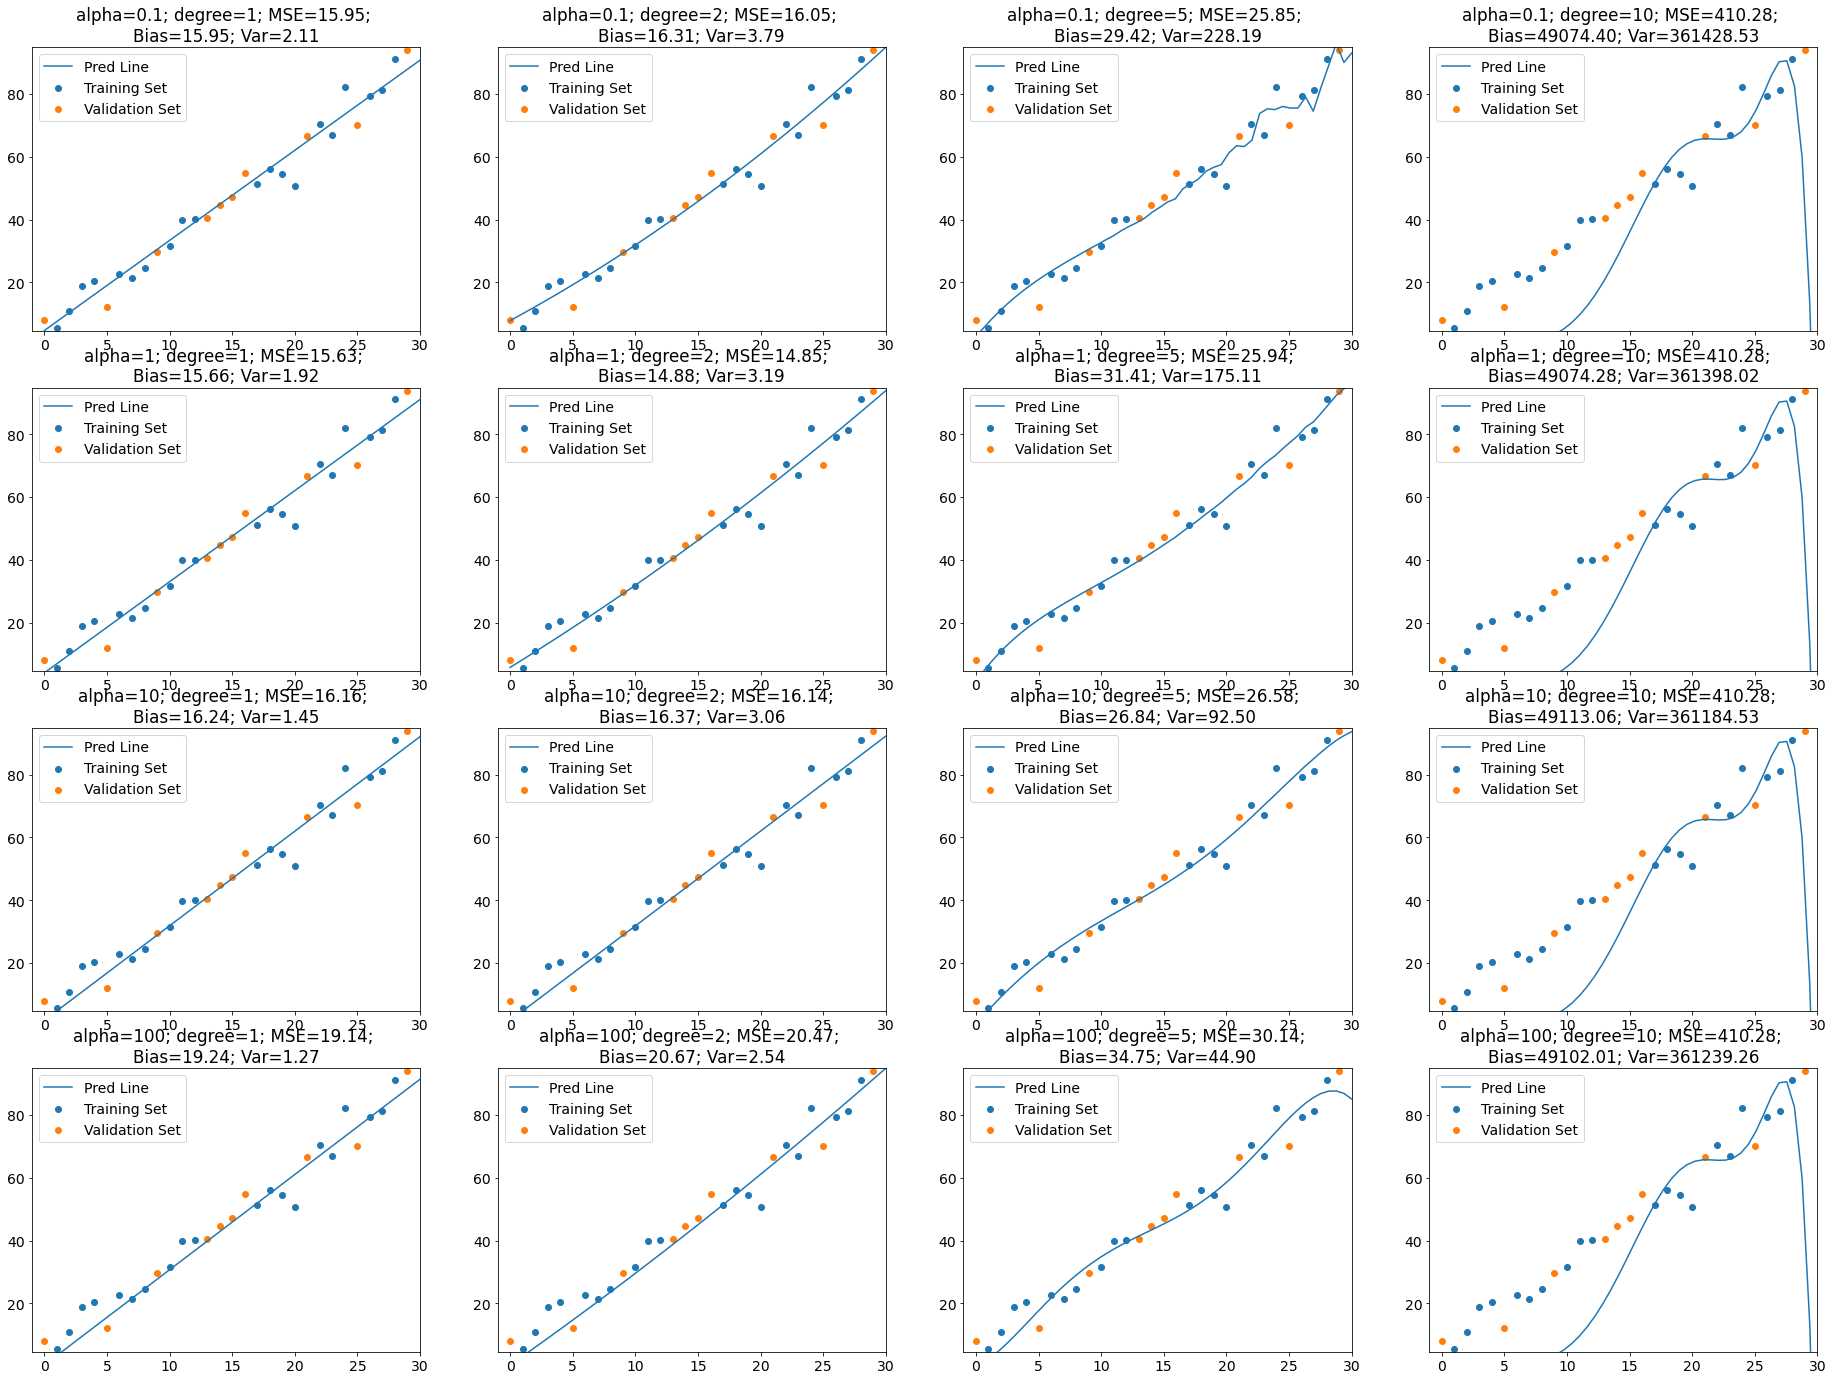

In [ ]:
plt.figure(figsize=[6.4 * 5, 4.8 * 5])

hyperParams = {
    'alpha': [0.1, 1, 10, 100],
    'degree': [1, 2, 5, 10],
}
paramGrid = ParameterGrid(hyperParams)

estimator = KernelRidge(kernel='polynomial')
for index, param in enumerate(paramGrid):
    plt.subplot(4, 4, index + 1)
    tmpEst = clone(estimator)
    tmpEst.set_params(**param)
    tmpEst.fit(trX, trY)
    predY = tmpEst.predict(valX)
    mse = mean_squared_error(valY, predY)
    paramStr = '; '.join([f'{k}={v}' for k, v in param.items()])
    _, bias, var = bias_variance_decomp(
        clone(tmpEst),
        trX,
        trY,
        valX,
        valY,
        'mse',
        random_seed=rs,
    )

    plotTrDev(trX, trY, valX, valY)
    plotCurve(xRange, tmpEst)
    plt.title(f'{paramStr}; MSE={mse:.2f}; \n'
              f'Bias={bias:.2f}; Var={var:.2f}')
    plt.legend()
    plt.xlim([X.min() - 1, X.max() + 1])
    plt.ylim([y.min() - 1, y.max() + 1])
    # plt.savefig(f'Results/{paramStr}.png')
    # plt.show()
    print(paramStr, mse, bias, var)
#plt.savefig(f'Results/Overall.png')
plt.show()

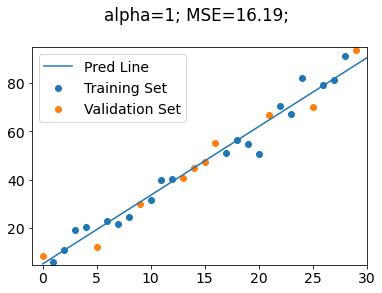

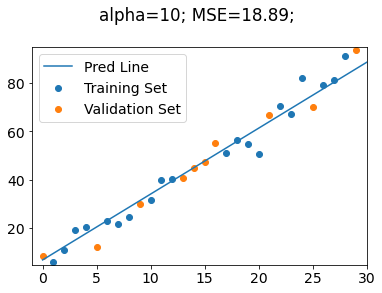

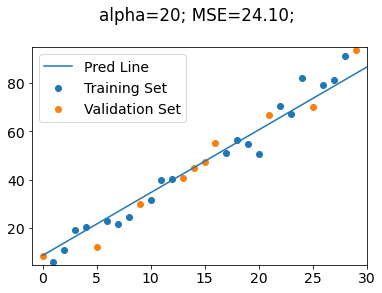

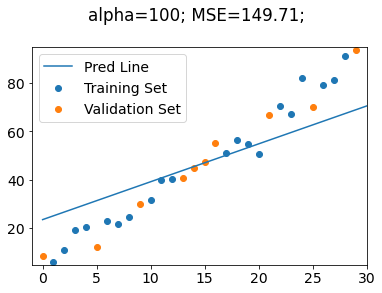

In [ ]:
for alpha in [1, 10, 20, 100]:
    model = Lasso(alpha).fit(trX, trY)
    predY = model.predict(valX)
    mse = mean_squared_error(valY, predY)
    plotTrDev(trX, trY, valX, valY)
    plotCurve(xRange, model)
    plt.title(f'alpha={alpha}; MSE={mse:.2f}; \n')
    plt.legend()
    plt.xlim([X.min() - 1, X.max() + 1])
    plt.ylim([y.min() - 1, y.max() + 1])
    #plt.savefig(f'Results/{alpha}.png')
    plt.show()

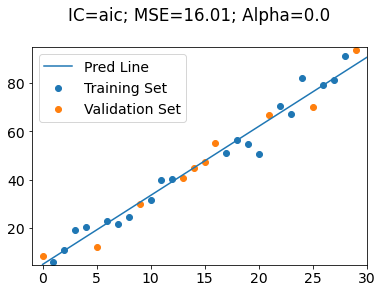

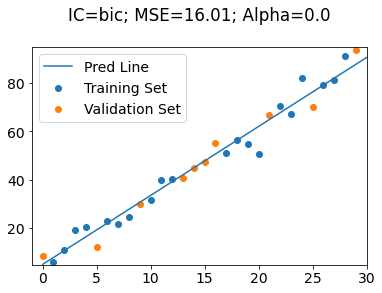

In [ ]:
for ic in ['aic', 'bic']:
    model = LassoLarsIC(ic)
    model.fit(trX, trY)
    predY = model.predict(valX)
    mse = mean_squared_error(valY, predY)
    plotTrDev(trX, trY, valX, valY)
    plotCurve(xRange, model)
    plt.title(f'IC={ic}; MSE={mse:.2f}; Alpha={model.alpha_}\n')
    plt.legend()
    plt.xlim([X.min() - 1, X.max() + 1])
    plt.ylim([y.min() - 1, y.max() + 1])
    #plt.savefig(f'Results/{ic}.png')
    plt.show()